In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-attrition/WA_Fn-UseC_-HR-Employee-Attrition.csv


(1470, 35)
      Age Attrition     BusinessTravel  DailyRate              Department  \
556    53        No      Travel_Rarely        346  Research & Development   
858    53        No      Travel_Rarely       1223  Research & Development   
415    34       Yes  Travel_Frequently        296                   Sales   
515    35        No         Non-Travel        727  Research & Development   
771    54        No      Travel_Rarely       1082                   Sales   
191    27        No      Travel_Rarely        894  Research & Development   
182    41       Yes      Travel_Rarely       1356                   Sales   
1275   51        No      Travel_Rarely        942  Research & Development   
540    28       Yes      Travel_Rarely        654  Research & Development   
1202   38        No      Travel_Rarely       1495  Research & Development   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
556                  6          3     Life Sciences              1   
8

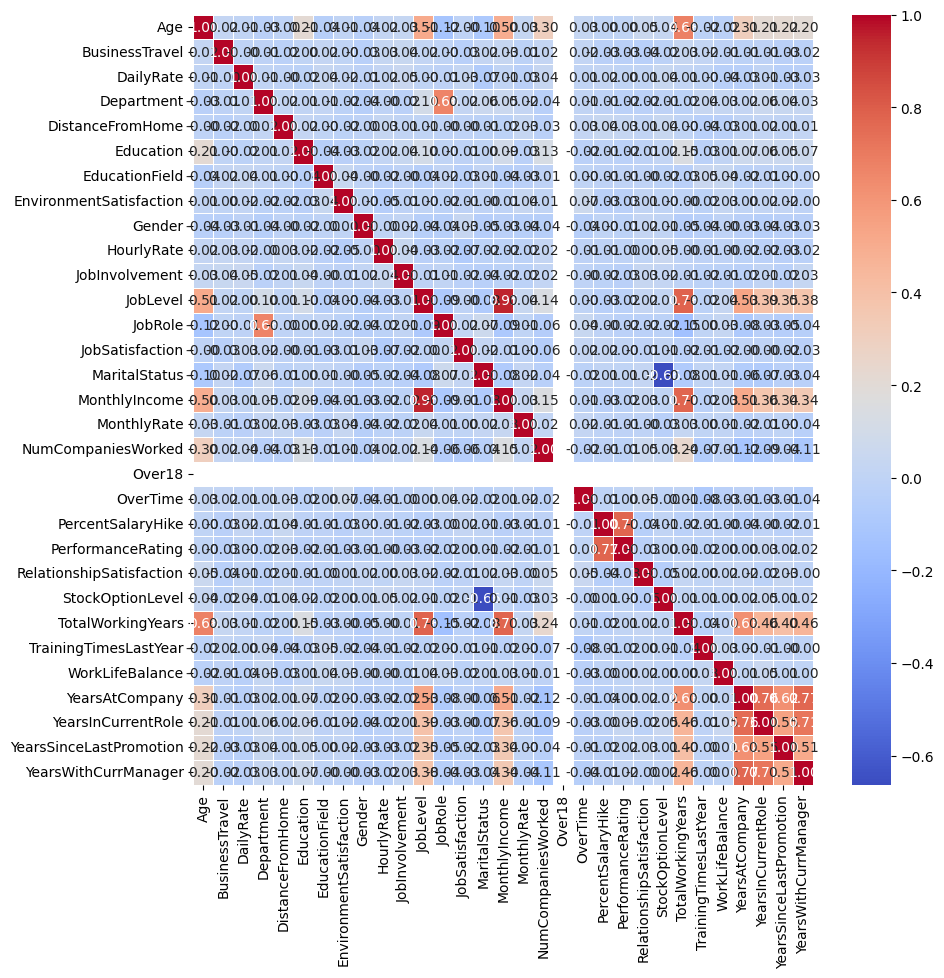

Logistic Regression:
[[249   6]
 [ 25  14]]
Accuracy: 0.8945578231292517
Decision Tree Classifier:
[[219  36]
 [ 32   7]]
Accuracy: 0.7687074829931972


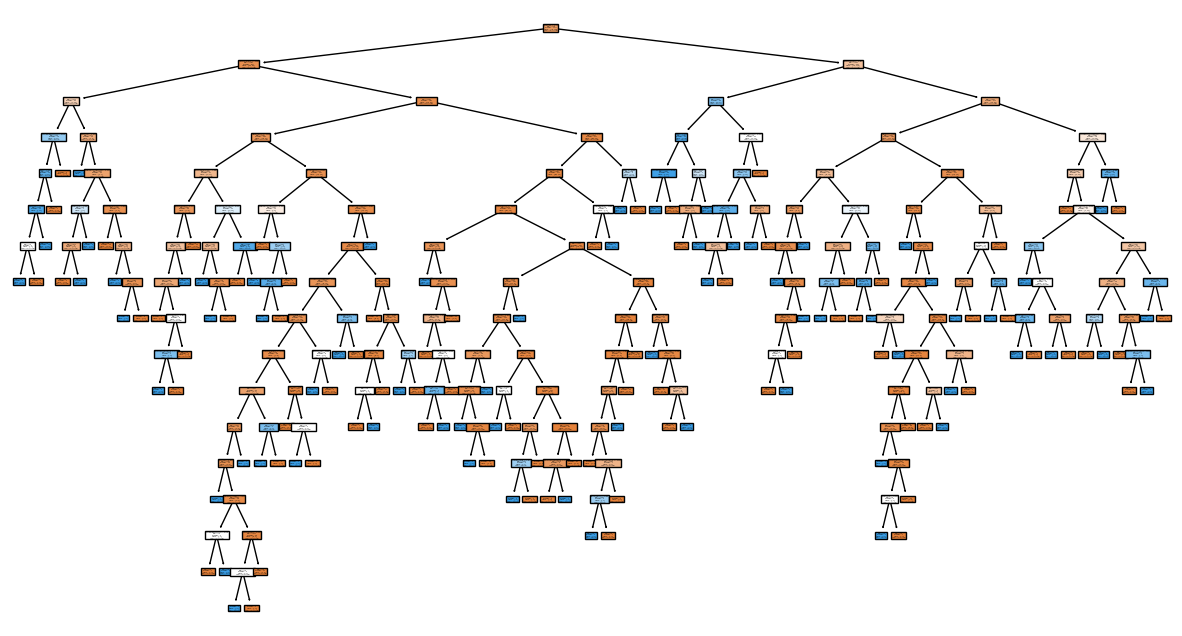

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Random Forest Classifier:
[[254   1]
 [ 35   4]]
Accuracy: 0.8775510204081632
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("/kaggle/input/employee-attrition/WA_Fn-UseC_-HR-Employee-Attrition.csv", sep=",", encoding="utf-8")

# Data Exploration
print(df.shape)
print(df.sample(10))
print(df.info())
print(df.nunique())
print(df.describe())
print(df.isnull().sum())

# Data Preprocessing
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Drop non-numeric columns and target variable
X = df.drop(columns=["EmployeeNumber", "EmployeeCount", "StandardHours", "Attrition"])
y = df["Attrition"]

# Scale the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Correlation matrix for the scaled numeric features
correlation_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()

# Data Visualization
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("Logistic Regression:")
print(cm)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("Decision Tree Classifier:")
print(cm)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=['No Attrition', 'Attrition'])
plt.show()

# Random Forest Classifier with Grid Search
forest_params = {
    'n_estimators': [100, 500, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2']
}

rfc = RandomForestClassifier(random_state=100)
grid_search = GridSearchCV(rfc, param_grid=forest_params, cv=5, scoring="accuracy")
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

rfc_cv = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                               criterion=best_params['criterion'],
                               max_depth=best_params['max_depth'],
                               max_features=best_params['max_features'],
                               random_state=100)
rfc_cv.fit(x_train, y_train)

# Evaluate Random Forest Classifier
y_pred = rfc_cv.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("Random Forest Classifier:")
print(cm)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
